### Considere as funções f1(x)=2x mod 7, f2(x)=3x mod 7 e f2(x)=6x mod 7.



- Descreva um circuito reversível para implementação de cada uma delas.

- Monte um circuito quântico para contar o número de ocorrências de uma determinada solução.

- Implemente seu circuito no Qiskit e execute no IBM Q Experience para contar o numero de ocorrências dos valores 1, 2 e 3 em cada função.

- Descreva e comente os resultados.


O teste foi feito com 6 qubits para ter uma faixa maior de números teste.

## Construindo ciruitos

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from numpy import pi

#Grover 00


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# A operação de reset retorna um qubit para o estado ∣ 0 ⟩, 
# independentemente de seu estado antes da aplicação da operação. Não é uma operação reversível.

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

# O portão H, ou Hadamard, gira os estados∣ 0 ⟩ e∣ 1 ⟩ para∣ + ⟩ e ∣ − ⟩, respectivamente.
# É útil para fazer superposições. Se você tiver um portão universal definido em um computador clássico
# e adicionar o portão Hadamard, ele se tornará um portão universal definido em um computador quântico.

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])






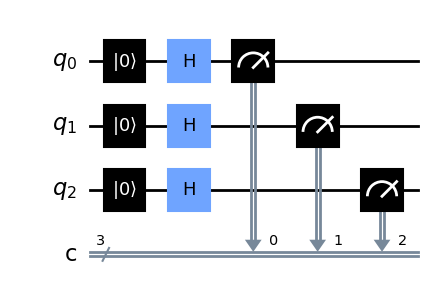

In [10]:
circuit.draw(output="mpl")

In [11]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit,simulator)

job = simulator.run(compiled_circuit, shots=10000)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)





Total count for 00 and 11 are: {'110': 1212, '000': 1181, '010': 1337, '101': 1269, '100': 1284, '011': 1246, '001': 1220, '111': 1251}


In [12]:
# Test converção binária
Nums = []
for i in counts.keys():
    Nums.append(int(i,2))


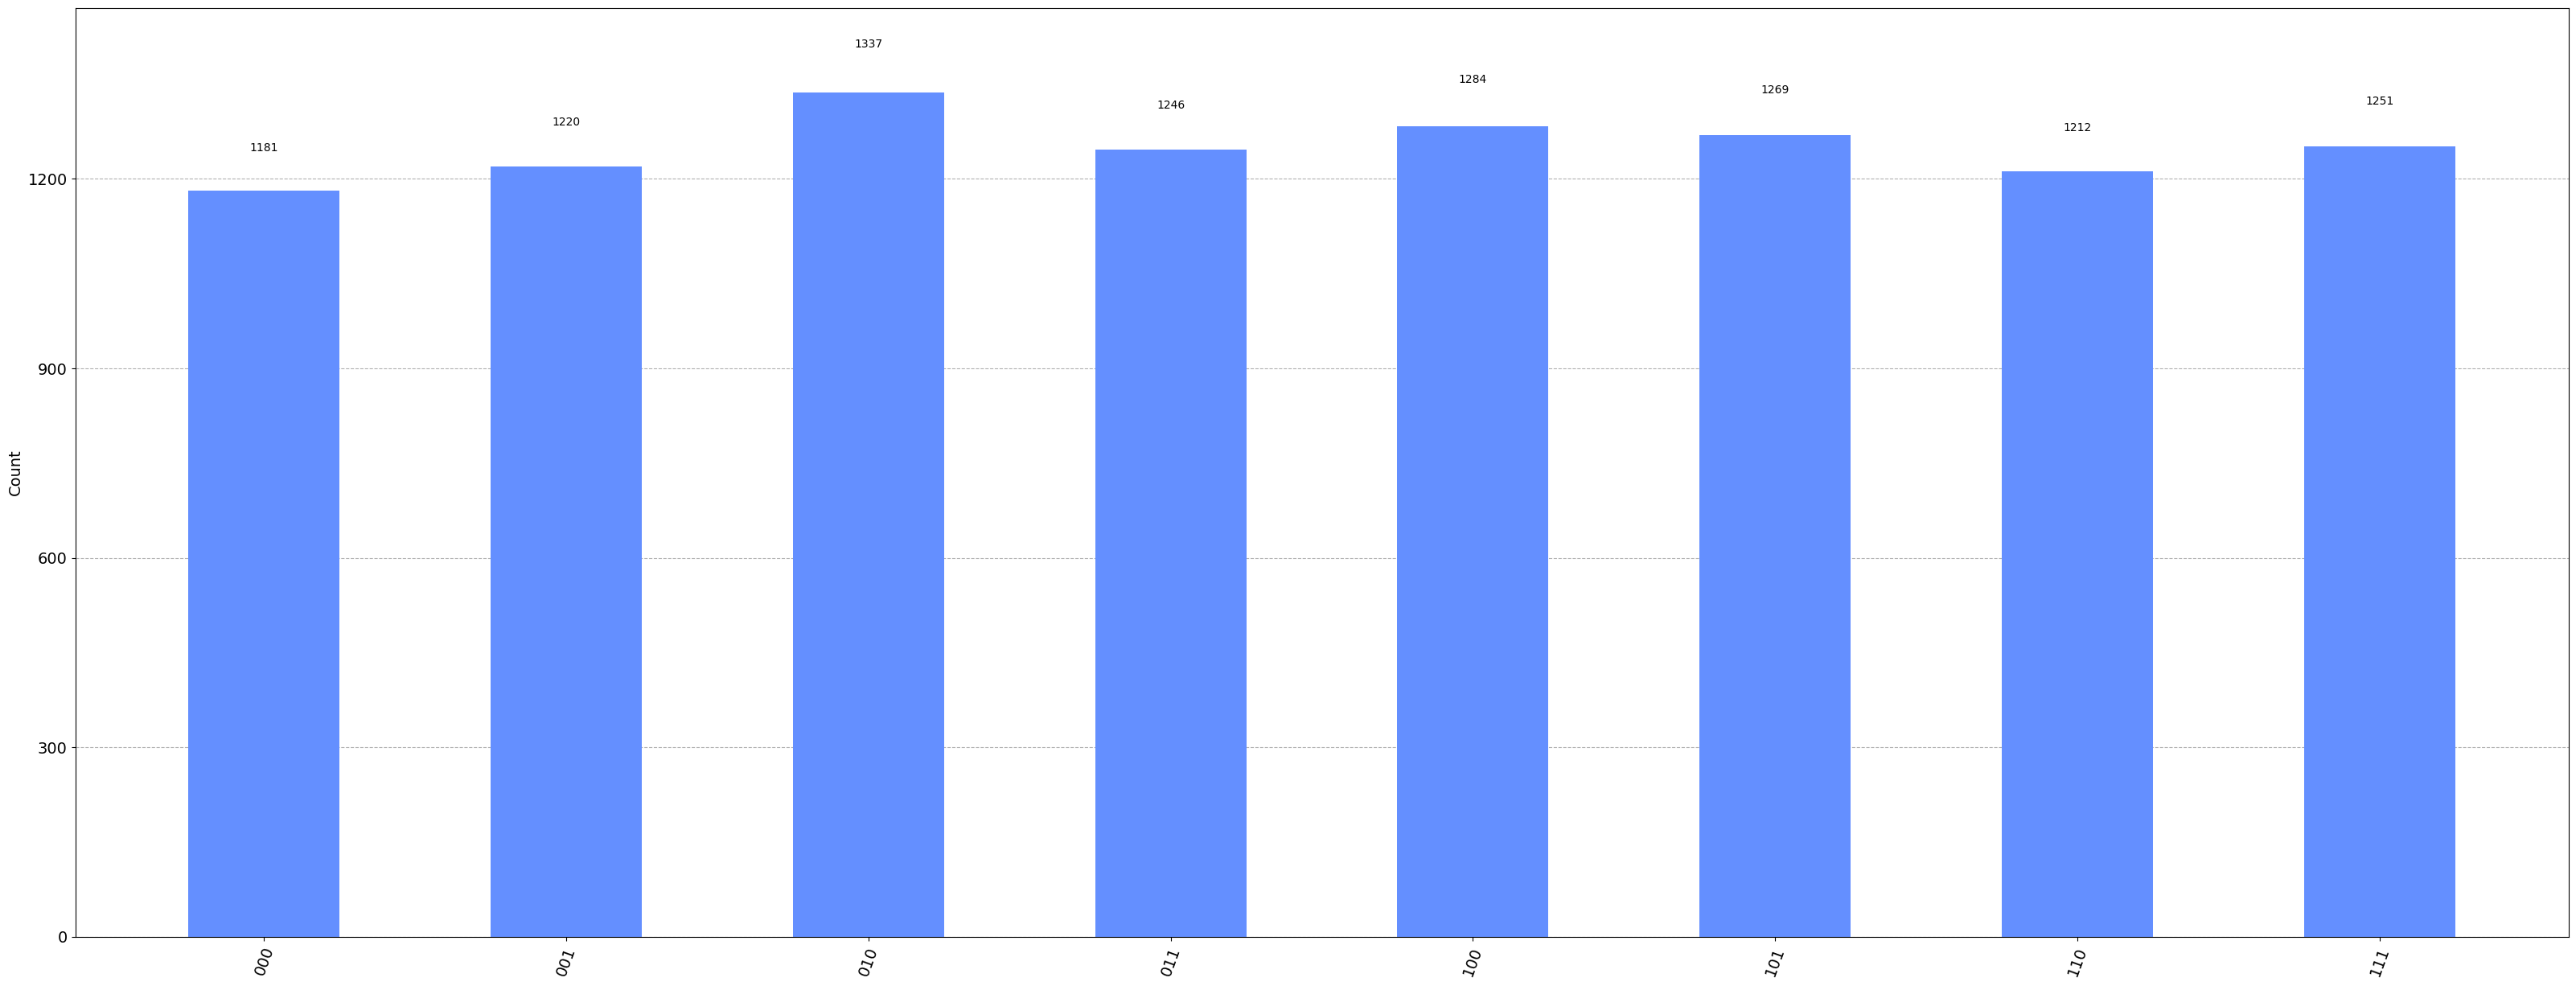

In [13]:
plot_histogram(counts, figsize=(40,15))

## Definindo funções

In [14]:

#f1(x)=2x mod 7
def f1(num):
    return (2*num) % 7

#f2(x)=3x mod 7
def f2(num):
    return (3*num) % 7

#f2(x)=6x mod 7
def f3(num):
    return (6*num) % 7

## Listas resultantes


In [15]:
ListaF1_results = []
ListaF2_results = []
ListaF3_results = []

for i in Nums:
    ListaF1_results.append(f1(i))
    ListaF2_results.append(f2(i))
    ListaF3_results.append(f3(i))

print(ListaF1_results)
print(ListaF2_results)
print(ListaF3_results)

[5, 0, 4, 3, 1, 6, 2, 0]
[4, 0, 6, 1, 5, 2, 3, 0]
[1, 0, 5, 2, 3, 4, 6, 0]


## Contagem de elementos
#### Implemente seu circuito no Qiskit e execute no IBM Q Experience para contar o numero de ocorrências dos valores 1, 2 e 3 em cada função.

In [26]:
#GROVER para 01, 10 e 11

#01


